In [15]:
alpha = 9.1

[-3 -1  1  3  5] [937.63 927.41 934.67 937.65 930.77] [1.93 1.55 1.29 1.41 1.49]
Chi-squared / dof = 8.21


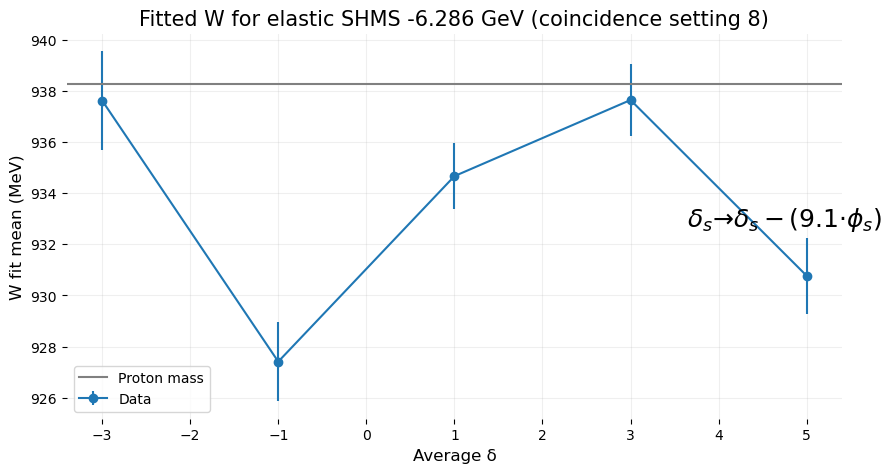

In [19]:
# 16th June 2024
import matplotlib.pyplot as plt
import uproot, time, sys, warnings, os
warnings.filterwarnings('ignore')
sys.path.append('/w/hallc-scshelf2102/xem2/ashard')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import colormaps as cmaps
from scipy.interpolate import griddata
from scipy import stats
from scipy.optimize import curve_fit
from common_functions import gaussian, shaxes, hw, Ei, Mp
from common_functions import E as R
from scipy.constants import physical_constants

momentum, sn = -6.286, 8
δ = np.array([-4, -2, 0, 2, 4])
dataw, simcw, errdw, errsw = [], [], [], []
for dell in δ:
    data = np.loadtxt(f'files/wα{alpha}{dell}{sn}.dat', dtype = float, ndmin=2)
    dw = data[:,0]
    ed = data[:,1]
    # sw = data[:,2]
    # es = data[:,3]
    lod = data[:,4]
    hid = data[:,5]
    dataw.append(dw[0])
    errdw.append(ed[0])

errdw, dataw = np.array(errdw), np.array(dataw)
δmean = δ+1
print(δmean, dataw, errdw)

# δmean = (lod + hid) / 2
fig, ax  = shaxes(xlabel = 'Average δ', ylabel = 'W fit mean (MeV)', title = f'Fitted W for elastic SHMS {momentum} GeV (coincidence setting {sn})', allgone = 'y')
ax.errorbar(δmean, dataw, yerr = errdw, label = 'Data', marker = 'o')
# ax.errorbar(δmean, simcw, yerr = errsw, label = 'SIMC', marker = 'o')
ax.axhline(y = Mp * 1000, color = 'gray', label = 'Proton mass')
ax.text(0.8, 0.5, rf'$δ_s→δ_s-({alpha}⋅ϕ_s)$', transform = ax.transAxes, fontsize = 18)
ax.legend()
plt.savefig(f'plots/shmswoptalpha{sn}{momentum}.png', dpi = 300)

weights = 1 / errdw**2
c = np.sum(weights * dataw) / np.sum(weights)  # weighted mean

chi2 = np.sum(((dataw - c) / errdw)**2)
dof = len(dataw) - 1  # degrees of freedom for constant fit
chi2_ndf = chi2 / dof

print(f"Chi-squared / dof = {chi2_ndf:.2f}")

values = np.column_stack((alpha, chi2_ndf, sn))
with open(f'files/chiα{alpha}.dat', 'w') as f:
    np.savetxt(f, values, fmt = '%.2f', comments = '')

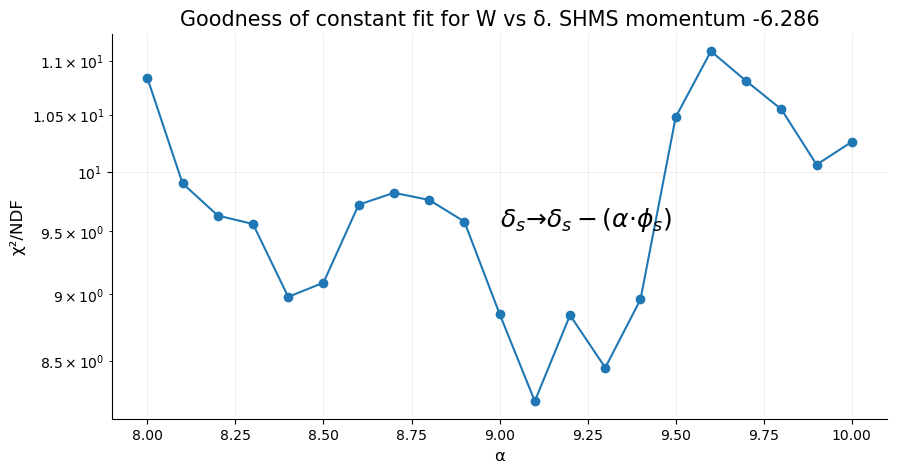

In [ ]:
α = np.arange(8, 10.1, 0.1)
χ = []
for a in α:
    alpha_fmt = f"{a:.1f}"
    with open(f'files/chiα{alpha_fmt}.dat', 'r') as f:
        data = np.loadtxt(f, dtype = float)
    chi = data[1]
    χ.append(chi)
χ = np.array(χ)
# mask = (α > 6) & (α < 13)
mask = α > -9999
fig, ax = shaxes(xlabel = 'α', ylabel = 'χ²/NDF', title = f'Goodness of constant fit for W vs δ. SHMS momentum {momentum}', yscale = 'log')
ax.text(0.5, 0.5, r'$δ_s→δ_s-(α⋅ϕ_s)$', transform = ax.transAxes, fontsize = 18)
ax.plot(α[mask], χ[mask], marker = 'o')
# plt.savefig('plots/chialpha.png', dpi = 300)